In [201]:
from openpiv import tools, process, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
from corrLib import readseq
from scipy.signal import medfilt2d
%matplotlib nbagg

## Tiffstack batch

In [193]:
imgDir = r'R:\Dip\DF\PIV_analysis\1.tif'
imgs = io.imread(imgDir)
# set PIV parameters
winsize = 50 # pixels
searchsize = 100  # pixels, search in image B
overlap = 25 # pixels
dt = 0.02 # sec
data = pd.DataFrame()
for num, img in enumerate(imgs):
    # read 2 adjacent images
    if num % 2 == 0:
        I0 = img
        continue 
    I1 = img
    # run PIV function "extended_search_area_piv()"
    u0, v0 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
                                                         window_size=winsize, overlap=overlap, dt=dt, 
                                                         search_area_size=searchsize)
    x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)    
    
    u1 = medfilt2d(u0, kernel_size=3)
    v1 = medfilt2d(v0, kernel_size=3)
    u1[np.isnan(u1)]=0
    v1[np.isnan(v1)]=0
    u2 = medfilt2d(u1, kernel_size=3)
    v2 = medfilt2d(v1, kernel_size=3)
    frame_data = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u2.flatten(), v2.flatten()]).T,
                   columns=['x', 'y', 'u', 'v']).assign(frame=num)
    if num < 2:
        data = frame_data
    else:
        data = data.append(frame_data)

S:\Anaconda\3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


## Image sequence batch

In [210]:
folder = r'I:\Google Drive\Code\Python\PIV\test_images\imseq'
fileList = readseq(folder)
frame = 0
data = pd.DataFrame()
for num, i in fileList.iterrows():    
    img = io.imread(i.Dir)
    if frame % 2 == 0:
        I0 = img
        frame += 1
        continue
    I1 = img    
    u0, v0 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
                                                         window_size=winsize, overlap=overlap, dt=dt, 
                                                         search_area_size=searchsize)
    x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)    
    
    u1 = medfilt2d(u0, kernel_size=3)
    v1 = medfilt2d(v0, kernel_size=3)
    u1[np.isnan(u1)]=0
    v1[np.isnan(v1)]=0
    u2 = medfilt2d(u1, kernel_size=3)
    v2 = medfilt2d(v1, kernel_size=3)
    frame_data = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u2.flatten(), v2.flatten()]).T,
                   columns=['x', 'y', 'u', 'v']).assign(frame=frame)
    if num < 2:
        data = frame_data
    else:
        data = data.append(frame_data)
    frame += 1

S:\Anaconda\3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


## When using sig2noise method, the first velocity field matrices are full of nans. Always use the piv method without using sig2noise parameter, like below.

In [148]:
# load images I0 and I1
for num, img in enumerate(imgs):
    if num == 2:
        break
    # read 2 adjacent images
    if num % 2 == 0:
        I0 = img
        continue    
    I1 = img

In [ ]:
# apply piv function
u01, v01 = process.extended_search_area_piv(I0.astype(np.int32), I1.astype(np.int32), 
                                                         window_size=winsize, overlap=overlap, dt=dt, 
                                                         search_area_size=searchsize)

In [99]:
# get coords
x, y = process.get_coordinates(image_size=I0.shape, window_size=winsize, overlap=overlap)

<IPython.core.display.Javascript object>


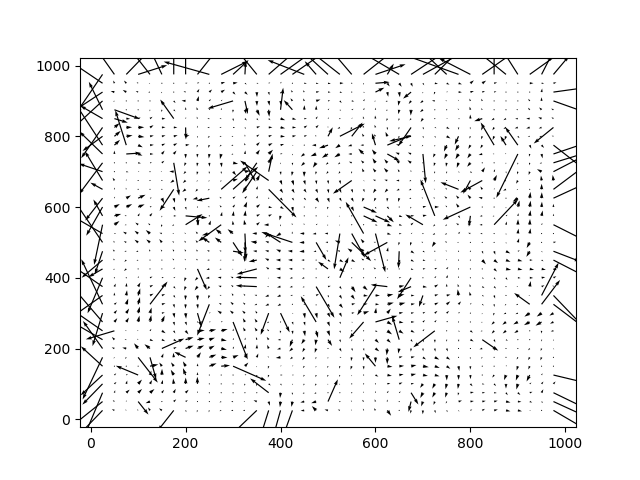

In [216]:
plt.quiver(x, y, u01, v01)

## Median filter with kernel_size=3 works well for smoothing the velocity field

In [103]:
# load openpiv(python) data for the first frame pair
pyt = pd.DataFrame(data=np.array([x.flatten(), y.flatten(), u02.flatten(), v02.flatten()]).T,
                   columns=['x', 'y', 'u', 'v'])
pyt.sort_values(by=['x', 'y'])

In [69]:
# load matpiv data for the first frame pair
mat = pd.read_csv(r'R:\Dip\DF\PIV_analysis\Analysis_1000\first_dataset.csv')
mat = mat.loc[mat.frame==1]

In [136]:
mat = mat.loc[(mat.x!=0)&(mat.y!=0)]
umat = np.array(mat.u).reshape(39, 39)
umat2 = medfilt2d(umat)
vmat = np.array(mat.v).reshape(39, 39)
vmat2 = medfilt2d(vmat)

## Comparison with matpiv result show good agreement
* Black: python-openpiv
* Red: matlab-matpiv

<IPython.core.display.Javascript object>


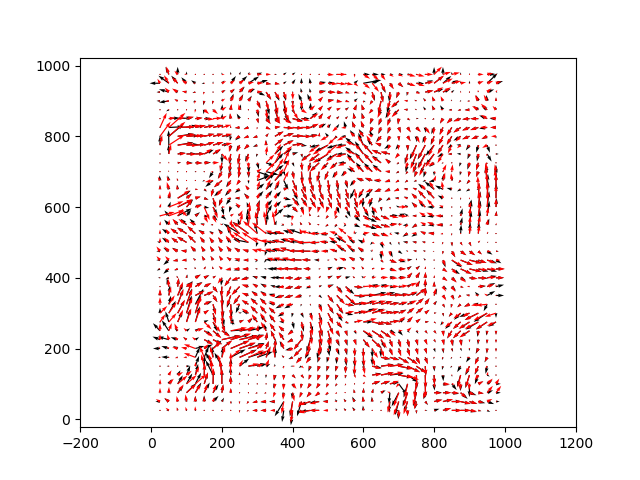

(-22.5, 1022.5, -22.5, 1022.5)

In [199]:
# remove nan values
u01[np.isnan(u01)]=0
v01[np.isnan(v01)]=0
# median filter
u02 = medfilt2d(u01, kernel_size=3)
v02 = medfilt2d(v01, kernel_size=3)
plt.quiver(x, y, u02, v02)
plt.quiver(mat.x, 1000-mat.y, umat2, -vmat2, color='red')
plt.axis('equal')

## Find outliers and remove them

In [176]:
u[np.isnan(u)]=0
v[np.isnan(v)]=0

In [183]:
u = medfilt2d(u, kernel_size=3)
v = medfilt2d(v, kernel_size=3)

<IPython.core.display.Javascript object>


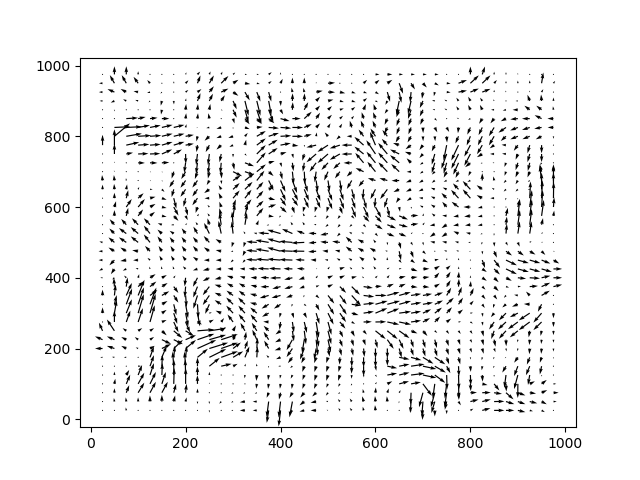

In [215]:
plt.quiver(x, y, u, v)

## Velocity field analysis - divergence and vorticity